# **패딩 ?**

**TensorFlow를 이용하여 자연어를 처리하는 방법(패딩)을 알아보다!**

패딩 테스트

* 서로 다른 개수의 단어로 이루어진 문장을 같은 길이로 만들어주기 위해 패딩을 사용할 수 있음

* 패딩을 사용하기 위해서는 tensorflow.keras.preprocessing.sequence 모듈의 pad_sequences 함수를 사용함

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
  'I love my dog',
  'I love my cat',
  'You love my dog!',
  'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(oov_token="OOV")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences) # 정수의 시퀀스로 변환된 텍스트 문장
padded = pad_sequences(sequences) # pad_sequences 함수에 이 시퀀스를 입력하면 숫자 0을 이용해서 가장 긴 시퀀스 길이 기준 같은 길이의 시퀀스로 변환

print(word_index)
print(sequences)
print(padded)

{'OOV': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


패딩 테스트 - padding 파라미터

* padding 파라미터를 ‘post’로 지정하면 시퀀스의 뒤에 패딩이 채워짐

In [ ]:
padded = pad_sequences(sequences, padding='post')
print(padded)

[[ 5  3  2  4  0  0  0]
 [ 5  3  2  7  0  0  0]
 [ 6  3  2  4  0  0  0]
 [ 8  6  9  2  4 10 11]]


패딩 테스트 - maxlen 파라미터

* maxlen 파라미터는 시퀀스의 최대 길이를 제한함

* 길이를 넘는 시퀀스는 잘라냄

In [ ]:
padded = pad_sequences(sequences, padding='pre', maxlen=6)
print(padded)

[[ 0  0  5  3  2  4]
 [ 0  0  5  3  2  7]
 [ 0  0  6  3  2  4]
 [ 6  9  2  4 10 11]]


패딩 테스트 - truncating 파라미터

* truncating 파라미터는 최대 길이를 넘는 시퀀스를 잘라낼 위치를 지정함

* 'post'로 지정하면 뒷부분을 잘라냄

In [ ]:
padded = pad_sequences(sequences, padding='pre', maxlen=6, truncating='post')
print(padded)

[[ 0  0  5  3  2  4]
 [ 0  0  5  3  2  7]
 [ 0  0  6  3  2  4]
 [ 8  6  9  2  4 10]]


# **네이버 영화 리뷰 - 패딩**

구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


한글 출력을 위해서 나눔 폰트 설치

In [ ]:
# 설치 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,183 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155013 files and d

정수 인코딩 데이터 불러오기

In [ ]:
import numpy as np

x_train_encoded = np.load("/content/drive/MyDrive/ml_data/NaverMovieReview/x_train_encoded.npy", allow_pickle=True)
x_test_encoded = np.load("/content/drive/MyDrive/ml_data/NaverMovieReview/x_test_encoded.npy", allow_pickle=True)

In [ ]:
x_train_encoded[:5]

array([list([20, 58, 888, 26, 206, 7, 21, 692]),
       list([970, 474, 484, 629, 2, 102, 1547, 39, 859, 942, 30, 356]),
       list([11, 184, 1]), list([8029, 134, 4127, 269, 77, 5, 44, 3319]),
       list([21623, 8481, 1044, 39, 2695, 46, 2, 2618, 27, 1111, 22, 318, 29, 9, 28, 46, 15305, 21624, 385, 2843, 1670])],
      dtype=object)

In [ ]:
x_test_encoded[:5]

array([list([781, 119]),
       list([69, 100, 44, 891, 306, 30, 24, 31, 590, 3394, 55, 848]),
       list([80, 30, 209, 116, 320, 129, 41, 3, 29]),
       list([9, 55, 8, 422, 224, 2004, 110, 511, 538, 49, 16, 585, 317, 19685, 785, 268]),
       list([215, 41, 137, 42, 215, 2])], dtype=object)

리뷰 최대 길이, 평균 길이

리뷰의 최대 길이 : 74
리뷰의 평균 길이 : 12.28


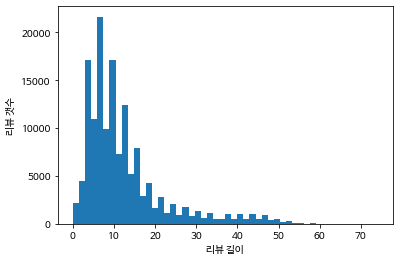

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

print("리뷰의 최대 길이 : {:,}".format(max(len(l) for l in x_train_encoded)))
print("리뷰의 평균 길이 : {:,.2f}".format(sum(map(len, x_train_encoded)) / len(x_train_encoded)))
plt.hist([len(s) for s in x_train_encoded], bins=50)
plt.xlabel("리뷰 길이")
plt.ylabel("리뷰 갯수")
plt.show()

리뷰 최대 길이 선정

→ 최대 길이를 50으로 할 경우 99.39708212%의 리뷰를 처리할 수 있음

In [ ]:
max_len = 50
cnt = 0
for s in x_train_encoded:
    if len(s) <= max_len:
        cnt = cnt + 1
print("리뷰 길이가 {} 이하인 비율: {:.8f}%".format(max_len, (cnt / len(x_train_encoded)) * 100))

리뷰 길이가 50 이하인 비율: 99.39708212%


패딩 처리

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train_padded = pad_sequences(x_train_encoded, maxlen=max_len)
x_test_padded = pad_sequences(x_test_encoded, maxlen=max_len)

패딩 처리된 데이터 저장

In [ ]:
np.save("/content/drive/MyDrive/ml_data/NaverMovieReview/x_train_padded.npy", x_train_padded, allow_pickle=True)
np.save("/content/drive/MyDrive/ml_data/NaverMovieReview/x_test_padded.npy", x_test_padded, allow_pickle=True)